Cells as given by the challenge - 

In [4]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy
import matplotlib.pyplot as plt

In [11]:
def quantum_model(n, train_params, x, model_type):
    """
    Builds an in-series or parallel quantum model according to the specifications in the problem statement, returning
    the expectation value on the first wire.

    Args: 
        n (int): The total number of encoding gates. Assumed to be smaller than,
                or equal to, the number of wires (3).
        train_params (list(float)): A list of length n + 1, which indicates the rotation parameter characterizing
                    the trainable circuit. If the circuit is parallel, only the first two parameters are used.
        x (float): A real number representing the input data point.
        model_type (str): A string that is "series" or "parallel", depending on the type of model.  

    Returns: 
        (float): The expectation value of PauliZ measurements on the first wire.
    """ 
    
    num_wires=3

    dev = qml.device('default.qubit', wires = num_wires)

    # Write any helper functions, such as subcircuits you may use later, here.
    def W(theta):
        qml.Hadamard(0)
        qml.CRX(theta, wires = [0,1])
        qml.Hadamard(1)
        qml.CRX(theta, wires = [1,2])
        qml.Hadamard(2)
        qml.CRX(theta, wires = [2,0])
    
    def S_series(x):
        qml.RX(x,wires = 0)

    def S_parallel(x,n):
        for wire in range(n):
            qml.RX(x,wires = wire)
            
    @qml.qnode(dev)
    def circuit(n, train_params, x, model_type):
        if model_type == "parallel":
            # Put your code here #
            W(train_params[0])
            S_parallel(x,n)
            W(train_params[1])
        elif model_type == "series":
            # Put your code here #
            for series_num in range(n):
                W(train_params[series_num])
                S_series(x)
            series_num+=1
            W(train_params[series_num])
        
        # Return an expectation value
        return qml.expval(qml.PauliZ(0))


            
    result = float(circuit(n, train_params, x, model_type))
    return result

    # Finally, return a float, not a numpy tensor. You can do this using the .numpy() method!

In [ ]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = quantum_model(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises: 
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your circuit doesn't look quite right."

In [5]:
test_cases = [['[2,[0.4,0.8,1.0],1.2,"parallel"]', '0.977856732420062'], ['[3,[0.6,0.7,0.8,1.2],1.3,"series"]', '0.37048658401504975']]

In [6]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[2,[0.4,0.8,1.0],1.2,"parallel"]'...
Runtime Error. name 'run' is not defined
Running test case 1 with input '[3,[0.6,0.7,0.8,1.2],1.3,"series"]'...
Runtime Error. name 'run' is not defined


My implementations - 

In [6]:
def quantum_model1(n, train_params, x, model_type):
    """
    Builds an in-series or parallel quantum model according to the specifications in the problem statement, returning
    the expectation value on the first wire.

    Args: 
        n (int): The total number of encoding gates. Assumed to be smaller than,
                or equal to, the number of wires (3).
        train_params (list(float)): A list of length n + 1, which indicates the rotation parameter characterizing
                    the trainable circuit. If the circuit is parallel, only the first two parameters are used.
        x (float): A real number representing the input data point.
        model_type (str): A string that is "series" or "parallel", depending on the type of model.  

    Returns: 
        (float): The expectation value of PauliZ measurements on the first wire.
    """ 
    
    num_wires=3

    dev = qml.device('default.qubit', wires = num_wires)

    def W(theta):
        qml.Hadamard(0)
        qml.CRX(theta, wires = [0,1])
        qml.Hadamard(1)
        qml.CRX(theta, wires = [1,2])
        qml.Hadamard(2)
        qml.CRX(theta, wires = [2,0])
    
    def S_series(x):
        qml.RX(x,wires = 0)

    def S_parallel(x,n):
        for wire in range(n):
            qml.RX(x,wires = wire)

    @qml.qnode(dev)
    def circuit(n, train_params, x, model_type):
        if model_type == "parallel":
            W(train_params[0])
            S_parallel(x,n)
            W(train_params[1])
        elif model_type == "series":
            for series_num in range(n):
                W(train_params[series_num])
                S_series(x)
            series_num+=1
            W(train_params[series_num])
        
        return qml.expval(qml.PauliZ(0))
    
    result = float(circuit(n, train_params, x, model_type))
    return result

test_cases = [[[2,[0.4,0.8,1.0],1.2,"parallel"], 0.977856732420062], [[3,[0.6,0.7,0.8,1.2],1.3,"series"], 0.37048658401504975]]
    
for (input,answer) in test_cases:
    print(input, answer)
    n = input[0]
    train_params = input[1]
    x = input[2]
    model_type = input[3]
    
    qm = quantum_model1(n, train_params, x, model_type)
    print(qm-answer)

[2, [0.4, 0.8, 1.0], 1.2, 'parallel'] 0.977856732420062
0.0
[3, [0.6, 0.7, 0.8, 1.2], 1.3, 'series'] 0.37048658401504975
0.0


In [7]:
def W(theta):
    qml.Hadamard(0)
    qml.CRX(theta, wires = [0,1])
    qml.Hadamard(1)
    qml.CRX(theta, wires = [1,2])
    qml.Hadamard(2)
    qml.CRX(theta, wires = [2,0])
    
def S_series(x):
    qml.RX(x,wires = 0)
    
def S_parallel(x,n):
    for w in range(n):
        qml.RX(x,wires = w)

In [8]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    output = quantum_model(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises: 
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your circuit doesn't look quite right."
    
test_cases = [['[2,[0.4,0.8,1.0],1.2,"parallel"]', '0.977856732420062'], 
              ['[3,[0.6,0.7,0.8,1.2],1.3,"series"]', '0.37048658401504975']]
run('[2,[0.4,0.8,1.0],1.2,"parallel"]')

NameError: name 'quantum_model' is not defined

In [9]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[2,[0.4,0.8,1.0],1.2,"parallel"]'...
Runtime Error. name 'quantum_model' is not defined
Running test case 1 with input '[3,[0.6,0.7,0.8,1.2],1.3,"series"]'...
Runtime Error. name 'quantum_model' is not defined


In [13]:
def quantum_model(n, train_params, x, model_type):
    """
    Builds an in-series or parallel quantum model according to the specifications in the problem statement, returning
    the expectation value on the first wire.

    Args: 
        n (int): The total number of encoding gates. Assumed to be smaller than,
                or equal to, the number of wires (3).
        train_params (list(float)): A list of length n + 1, which indicates the rotation parameter characterizing
                    the trainable circuit. If the circuit is parallel, only the first two parameters are used.
        x (float): A real number representing the input data point.
        model_type (str): A string that is "series" or "parallel", depending on the type of model.  

    Returns: 
        (float): The expectation value of PauliZ measurements on the first wire.
    """ 
    
    num_wires=3

    dev = qml.device('default.qubit', wires = num_wires)

    # Write any helper functions, such as subcircuits you may use later, here.
    def W(theta, wires):
#         print('W',theta,wires)
        qml.Hadamard(wires[0])
        qml.CRX(theta, wires = [0,1])
        qml.Hadamard(wires[1])
        qml.CRX(theta, wires = [1,2])
        qml.Hadamard(wires[2])
        qml.CRX(theta, wires = [2,0])
    
    def SSeries(x,wires):
#         print('SS',x,wires)
        qml.RX(x,wires)

    def SParallel(x,n,wires):
#         print('SP',x,wires)
        for wire in range(n):
            qml.RX(x,wires = wires[wire])
#         feature_vector = [x]*n
#         qml.AngleEmbedding(features=feature_vector, wires=range(n), rotation='X')
            
    @qml.qnode(dev)
    def circuit(n, train_params, x, model_type):
        if model_type == "parallel":
            # Put your code here #
            W(train_params[0],wires=range(3))
            SParallel(x,n,wires = range(n))
            W(train_params[1],wires=range(3))
        elif model_type == "series":
            # Put your code here #
            for series_num in range(n):
                W(train_params[series_num],wires = range(3))
                SSeries(x,0)
            series_num+=1
            W(train_params[series_num],wires = range(3))
        
        # Return an expectation value
        return qml.expval(qml.PauliZ(0))
    
    result = circuit(n, train_params, x, model_type)
    #print circuit
    qml.drawer.use_style("black_white")
    fig, ax = qml.draw_mpl(circuit)(n, train_params, x, model_type)
    plt.show()
    print(result)
    return result

    # Finally, return a float, not a numpy tensor. You can do this using the .numpy() method!
    
# test_cases = [[[2,[0.4,0.8,1.0],1.2,"parallel"], 0.977856732420062], 
#                   ['[3,[0.6,0.7,0.8,1.2],1.3,"series"]', '0.37048658401504975']
#                  ,[3,[0.6,0.7,0.8,1.2],1.3,"series"],0.37048658401504975]

# for (input,answer) in test_cases:
#     print(input, answer)
#     n = input[0]
#     train_params = input[1]
#     x = input[2]
#     model_type = input[3]
    
#     qm = quantum_model(n, train_params, x, model_type)
#     print(qm-answer)

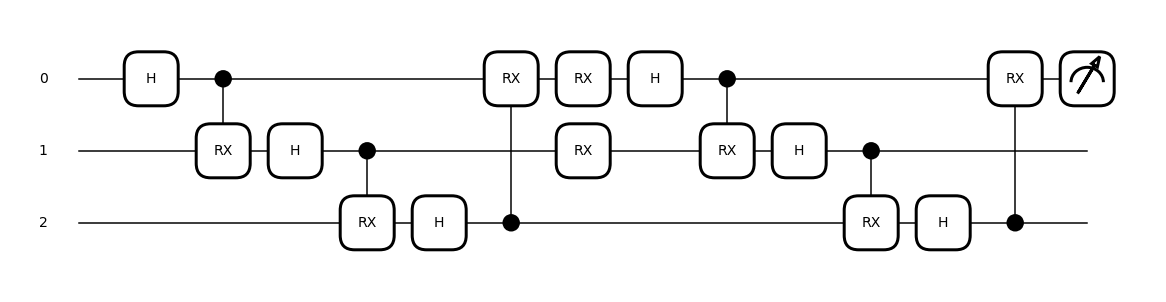

0.977856732420062


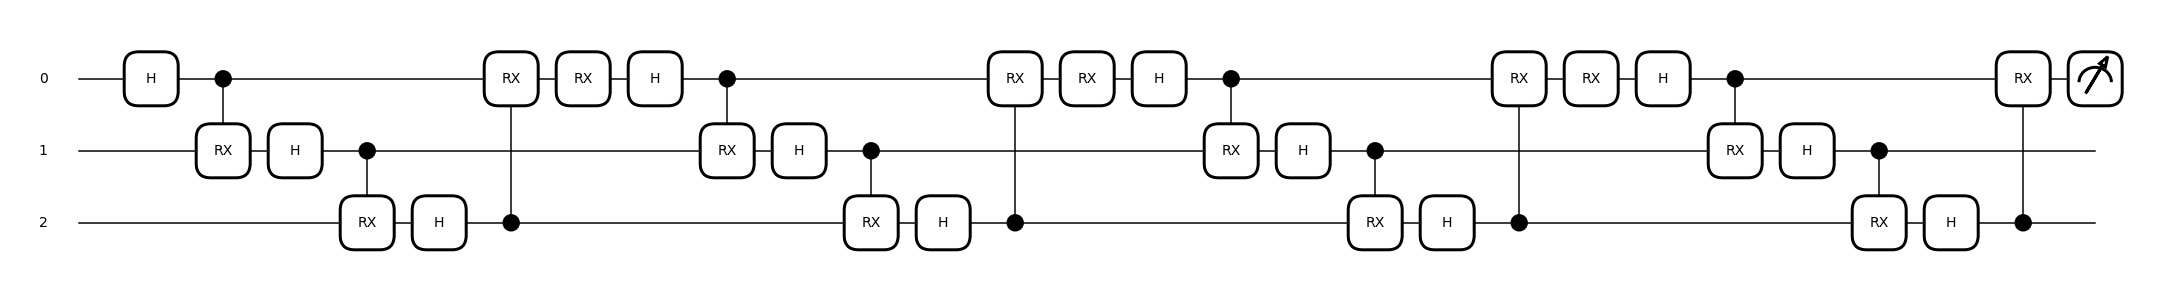

0.37048658401504975


'0.37048658401504975'

In [14]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    output = quantum_model(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises: 
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your circuit doesn't look quite right."
    
test_cases = [['[2,[0.4,0.8,1.0],1.2,"parallel"]', '0.977856732420062'], 
              ['[3,[0.6,0.7,0.8,1.2],1.3,"series"]', '0.37048658401504975']]
run('[2,[0.4,0.8,1.0],1.2,"parallel"]')
run('[3,[0.6,0.7,0.8,1.2],1.3,"series"]')